Instructions
Your task is to explore the IMDB Movie Dataset, which includes columns like Series_Title, Released_Year, Certificate, Runtime, Genre, IMDB_Rating, Meta_score, Director, Stars, No_of_votes, and Gross.

Load and Inspect Data:
- Use pandas to load the IMDB Movie Dataset.
- Inspect the data to understand its structure and contents.

Data Preprocessing:
- Handle missing values and convert data types as needed.

Rating Trends Over Years:
- Create a line plot with Matplotlib showing trends in IMDB_Rating over the years.

Genre Popularity Analysis:
- Generate a Seaborn bar plot to compare the number of movies across different genres.

Director’s Impact on Ratings:
- Use a Matplotlib scatter plot to examine the relationship between directors and movie ratings.

Star Power Analysis:
- Employ a Seaborn pairplot to explore relationships involving Stars and their impact on IMDB_Rating and Gross.

Box Plot of Genres vs. Ratings:
- Visualize the distribution of IMDB_Rating across different Genres using a Seaborn box plot.

Correlation Heatmap:
- Create a heatmap using Seaborn to identify correlations between numerical columns like IMDB_Rating, Meta_score, No_of_votes, and Gross.


In [265]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import sklearn.datasets as datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('/Users/teitelbaumsair/Desktop/DI_Bootcamp/W5/D2/DAILY CHALLENGE/imdb_top_1000.csv')
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [266]:
df.describe ()

IMDB_Rating  Meta_score   No_of_Votes
count  1000.000000  843.000000  1.000000e+03
mean      7.949300   77.971530  2.736929e+05
std       0.275491   12.376099  3.273727e+05
min       7.600000   28.000000  2.508800e+04
25%       7.700000   70.000000  5.552625e+04
50%       7.900000   79.000000  1.385485e+05
75%       8.100000   87.000000  3.741612e+05
max       9.300000  100.000000  2.343110e+06

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [268]:
df.shape

(1000, 16)

In [269]:
df.describe()

IMDB_Rating  Meta_score   No_of_Votes
count  1000.000000  843.000000  1.000000e+03
mean      7.949300   77.971530  2.736929e+05
std       0.275491   12.376099  3.273727e+05
min       7.600000   28.000000  2.508800e+04
25%       7.700000   70.000000  5.552625e+04
50%       7.900000   79.000000  1.385485e+05
75%       8.100000   87.000000  3.741612e+05
max       9.300000  100.000000  2.343110e+06

In [270]:
df.isna().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [271]:
df.duplicated().sum() # 0

np.int64(0)

Plan of action:
- First, change the name of Runtime to Runtime_in_Minutes, and remove the "Min" from each number in the column, finally change the column values to float64. Change the column Gross to Gross_Earnings_USD, and change the value from object to float64. Rename "star" columns to "Actor1,2,3,4". Make it a copy df. Convert release year to an int.
- Second, Normalize the number of votes to be between 0 and 1. 
- Third, manage the ISNA values for Certificate, Meta_score, and Gross. determine if I need to impute, drop, or replace. Do a fillNA where necessary.
- Fourth feature creation and understanding.

In [272]:
#Renaiming for clarity
df = df.rename(columns={
    'Poster_Link': 'Poster_Link', 
    'Series_Title': 'Series_Title', 
    'Released_Year': 'Release_Year', 
    'Certificate': 'Certificate',
    'Runtime': 'Runtime_in_Minutes', 
    'Genre': 'Genre', 
    'IMDB_Rating': 'IMDB_Rating', 
    'Overview': 'Overview', 
    'Meta_score': 'Meta_score', 
    'Director': 'Director',
    'Star1': 'Actor1', 
    'Star2': 'Actor2', 
    'Star3': 'Actor3', 
    'Star4': 'Actor4', 
    'No_of_Votes': 'No_of_Votes',  # Fix: No value was provided in your original code
    'Gross': 'Gross_Earnings_USD'
})

df2 = df[[
    'Poster_Link', 'Series_Title', 'Release_Year','Certificate', 
    'Runtime_in_Minutes', 'Genre', 'IMDB_Rating', 'Overview', 
    'Meta_score', 'Director', 'Actor1', 'Actor2', 'Actor3', 
    'Actor4', 'No_of_Votes', 'Gross_Earnings_USD'
]].copy()

In [273]:
#Normalizing data values

df['Runtime_in_Minutes'] = pd.to_numeric(df['Runtime_in_Minutes'].str.extract(r'(\d+)')[0]).astype(int)



In [274]:
min_votes = 2.508800e+04
max_votes = 2.343110e+06

df['Normalized_No_of_Votes'] = (df['No_of_Votes'] - min_votes) / (max_votes - min_votes)

In [275]:
df['Gross_Earnings_USD'] = df['Gross_Earnings_USD'].astype(str)  # Ensure the column is treated as a string
df['Gross_Earnings_USD'] = df['Gross_Earnings_USD'].str.replace(r'[^\d]', '', regex=True)  # Remove non-numeric characters

# Step 2: Convert the cleaned column to integers, handling NaN as necessary
df['Gross_Earnings_USD'] = pd.to_numeric(df['Gross_Earnings_USD'], errors='coerce').fillna(0).astype(int)


In [276]:
df.loc[:, 'Release_Year'] = pd.to_numeric(df['Release_Year'], errors='coerce')

# Drop rows where 'Release_Year' is NaN (if desired)
df = df.dropna(subset=['Release_Year'])

# Convert the 'Release_Year' column to int
df.loc[:, 'Release_Year'] = df['Release_Year'].astype(int)

In [277]:
df.drop(columns=['Certificate'], inplace=True)


In [278]:

# Separate known and missing values
known = df[df['Meta_score'].notna()]
missing = df[df['Meta_score'].isna()]

# Select features for prediction (features that could be related to Meta_score)
features = ['IMDB_Rating', 'Runtime_in_Minutes', 'No_of_Votes']  # Example features
X_known = known[features]
y_known = known['Meta_score']

# Train a linear regression model
model = LinearRegression()
model.fit(X_known, y_known)

# Predict missing Meta_score values
df.loc[df['Meta_score'].isna(), 'Meta_score'] = model.predict(missing[features])

In [279]:
df.isna().sum()

Poster_Link               0
Series_Title              0
Release_Year              0
Runtime_in_Minutes        0
Genre                     0
IMDB_Rating               0
Overview                  0
Meta_score                0
Director                  0
Actor1                    0
Actor2                    0
Actor3                    0
Actor4                    0
No_of_Votes               0
Gross_Earnings_USD        0
Normalized_No_of_Votes    0
dtype: int64

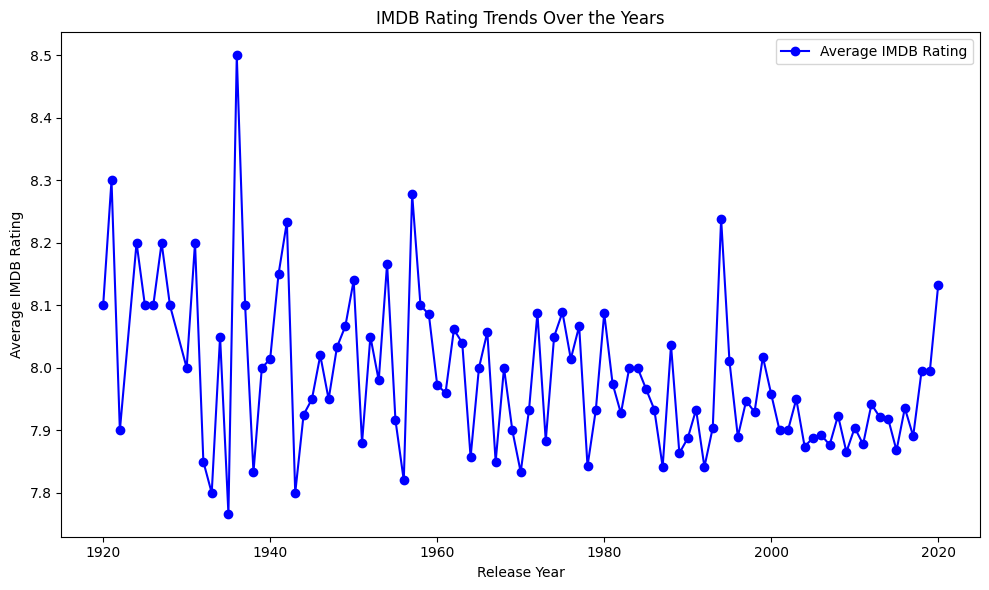

In [ ]:
# Create a line plot with Matplotlib showing trends in IMDB_Rating over the years.
yearly_avg_rating = df.groupby('Release_Year')['IMDB_Rating'].mean() 
# Groups the data by release year and computes the average IMDB rating for each year.

plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_rating.index, yearly_avg_rating.values, label='Average IMDB Rating', color='blue', marker='o')

# Add titles and labels
plt.title("IMDB Rating Trends Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Average IMDB Rating")

# Show legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

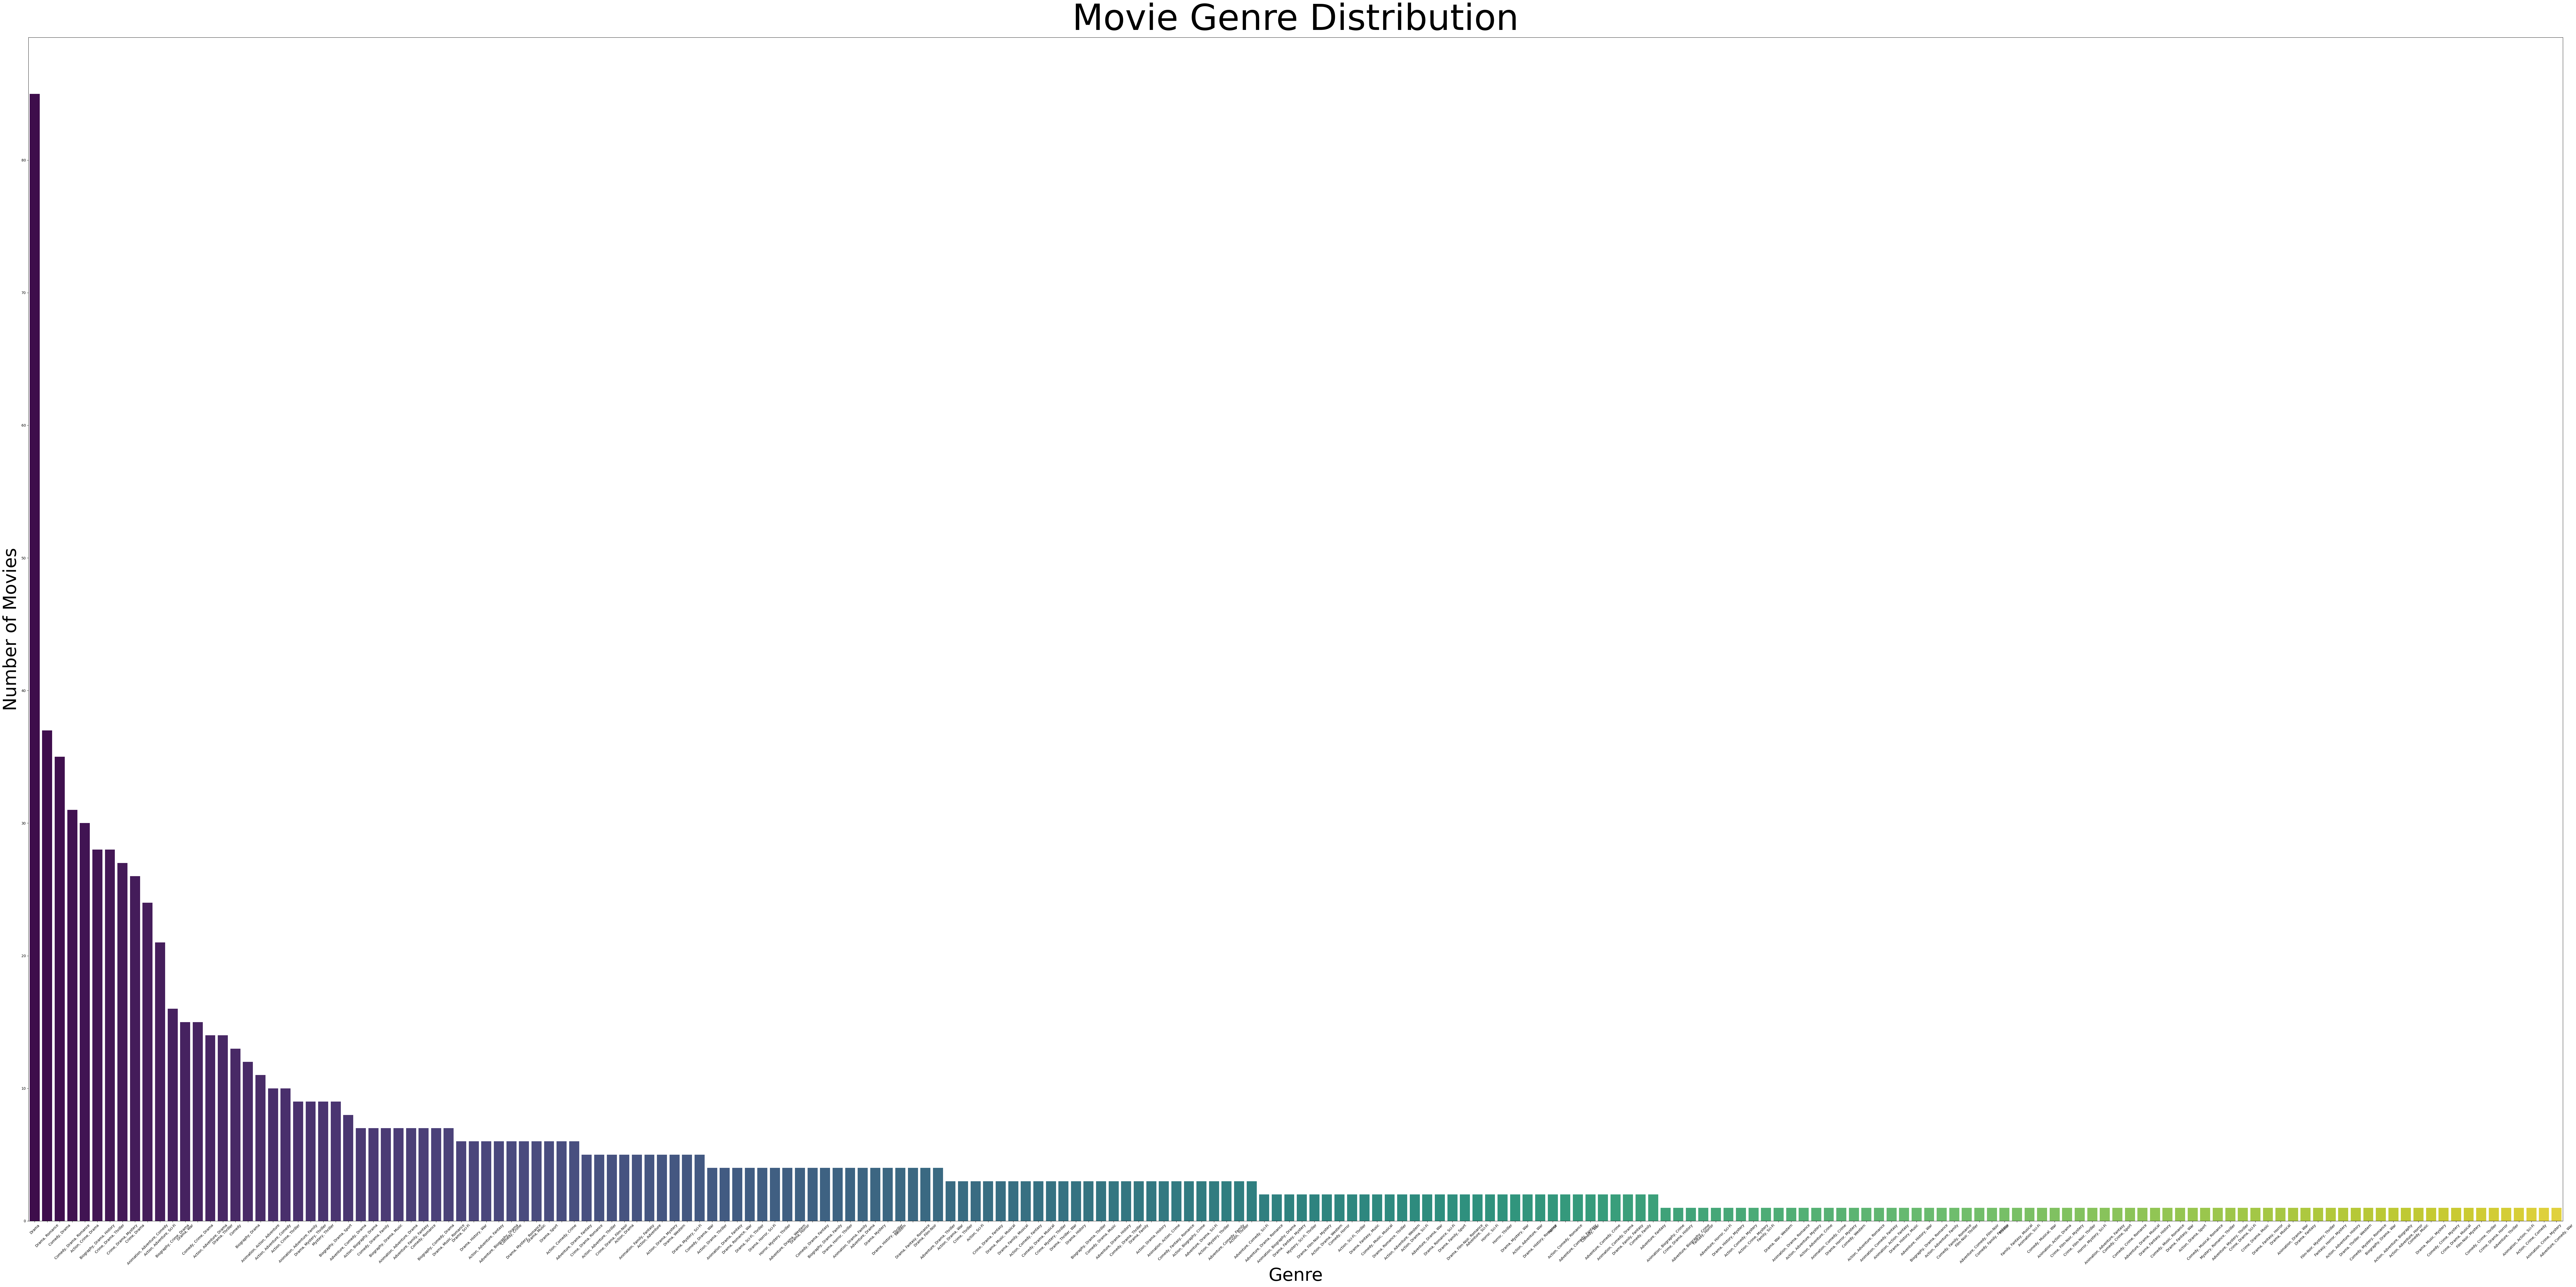

In [293]:
# Generate a Seaborn bar plot to compare the number of movies across different genres.
plt.figure(figsize=(100, 50))
Movie_Genre = df['Genre'].value_counts()
sns.barplot(x=Movie_Genre.index, y=Movie_Genre.values, hue=Movie_Genre.index, palette='viridis', legend=False)

plt.title('Movie Genre Distribution', fontsize=100)
plt.xlabel('Genre', fontsize=50)
plt.ylabel('Number of Movies', fontsize=50)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

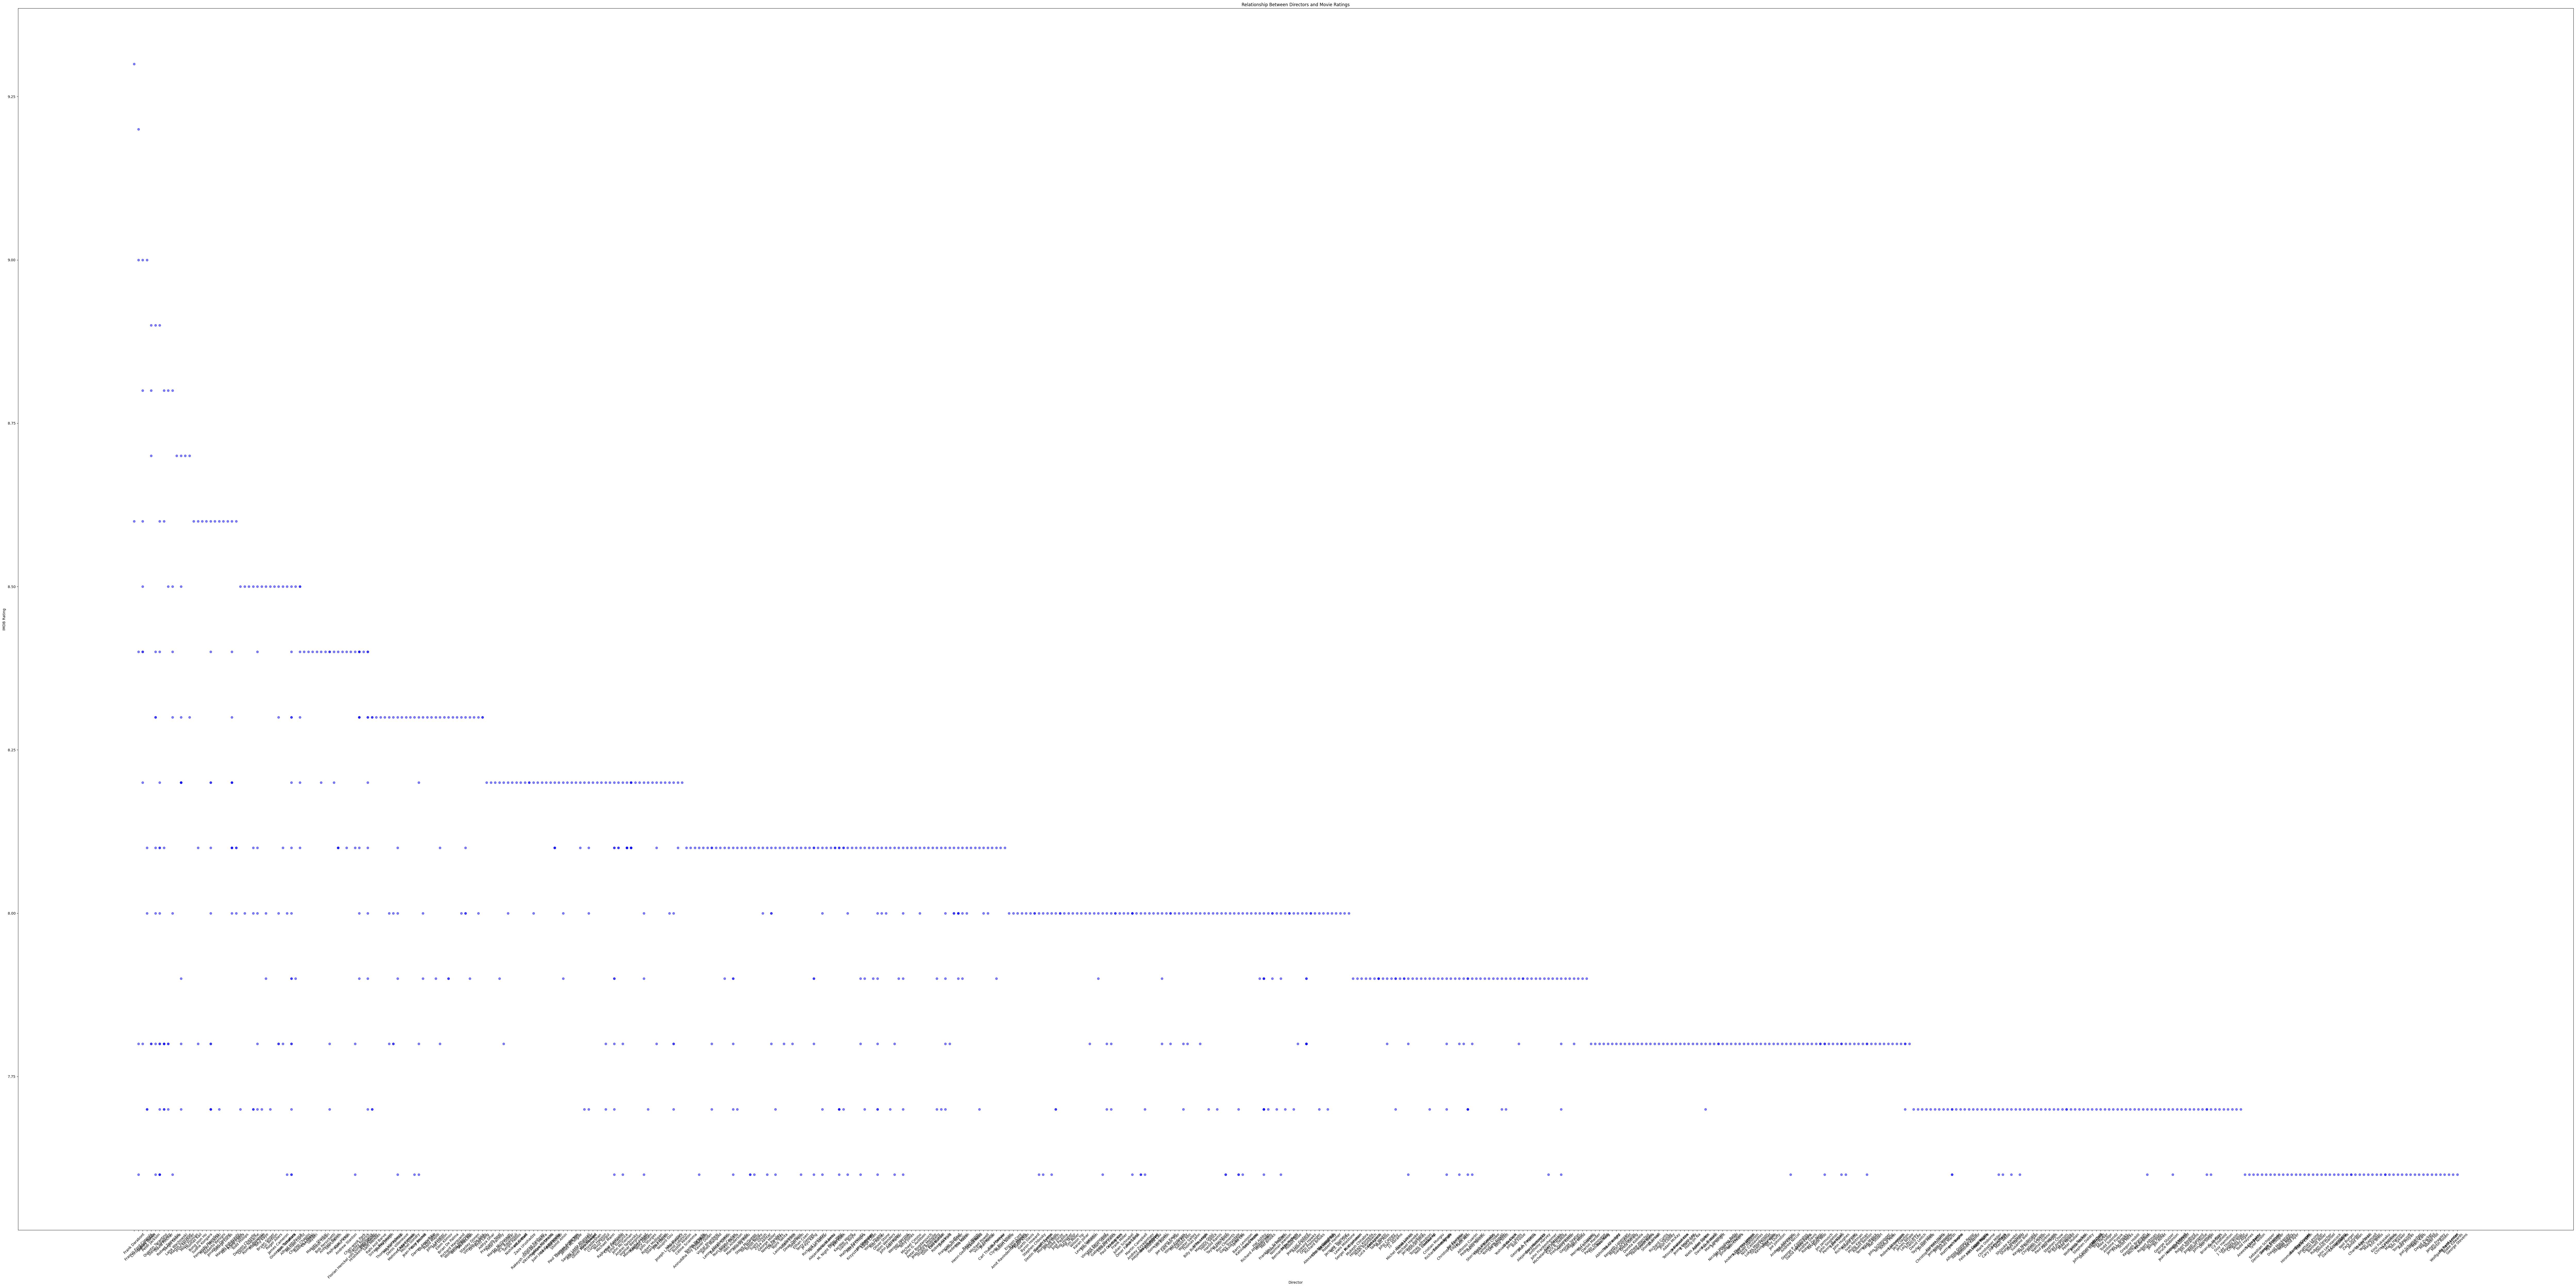

In [ ]:
# Use a Matplotlib scatter plot to examine the relationship between directors and movie ratings.

plt.figure(figsize=(100, 50))
plt.scatter(df['Director'], df['IMDB_Rating'], alpha=0.5, color='blue') #548 UNIQUE DIRECTORS...

# Add titles and labels
plt.title("Relationship Between Directors and Movie Ratings")
plt.xlabel("Director")
plt.ylabel("IMDB Rating")

# Rotate x-axis labels to avoid overlap if necessary
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [302]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Release_Year', 'Runtime_in_Minutes',
       'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Actor1',
       'Actor2', 'Actor3', 'Actor4', 'No_of_Votes', 'Gross_Earnings_USD',
       'Normalized_No_of_Votes'],
      dtype='object')

In [ ]:
# Employ a Seaborn pairplot to explore relationships involving Stars and their impact on IMDB_Rating and Gross.
sns.pairplot(df, vars=['IMDB_Rating','Actor1','Actor2', 'Actor3', 'Actor4', 'Gross_Earnings_USD',],
                 hue='IMDB_Rating')
plt.show()

# OR

sns.pairplot(df, vars=['IMDB_Rating', 'Gross_Earnings_USD'], hue='IMDB_Rating')

plt.show()

# For this there is hardly enough information to determine the correlation because for each category of actor, all the actors are different. So in order to calculate an actors impact, you would have to list all the individual acturs by name, and the movies they were in, then determine based on each movie how it performed. Even then, you cannot say that an actor is explicitly the cause of an impact on Gross or Rating. The script might have been terrible, the filming, low quality... many other factors go into a movies overall rating, not jus tthe actor. 

/var/folders/_7/7nx4t_6s6995xg_cj866wrmr0000gn/T/ipykernel_83578/1465221533.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y='IMDB_Rating', data=df, palette='viridis')


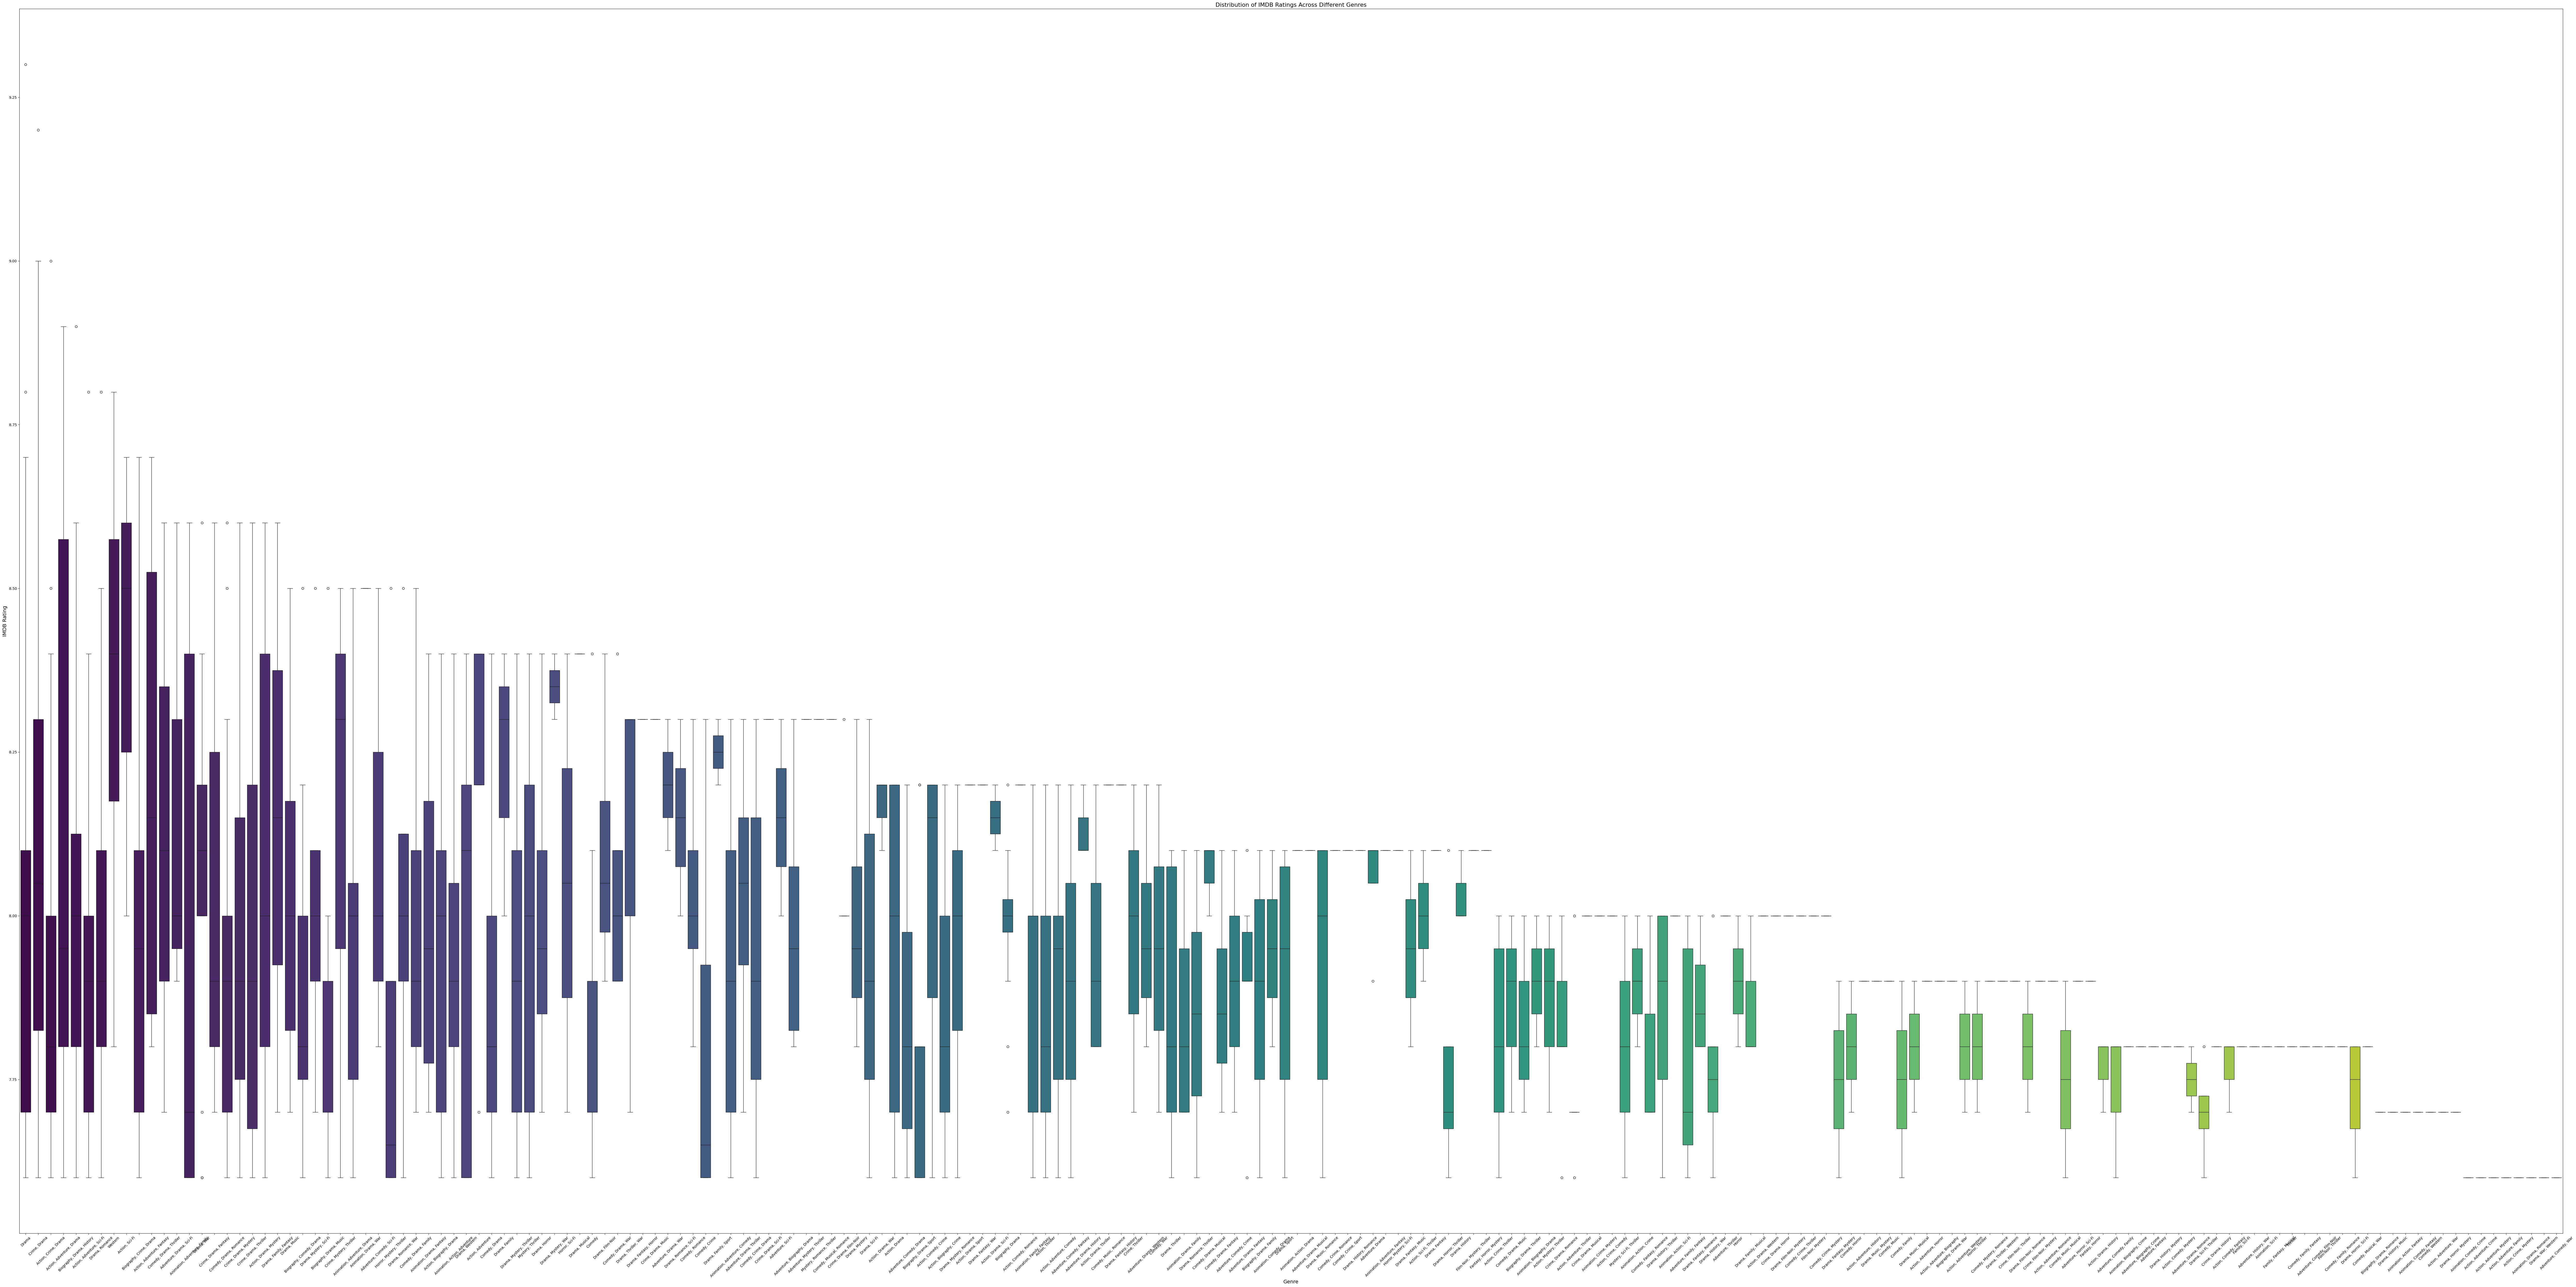

In [310]:
plt.figure(figsize=(100, 50))
sns.boxplot(x='Genre', y='IMDB_Rating', data=df, palette='viridis')

# Add title and labels
plt.title('Distribution of IMDB Ratings Across Different Genres', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('IMDB Rating', fontsize=14)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

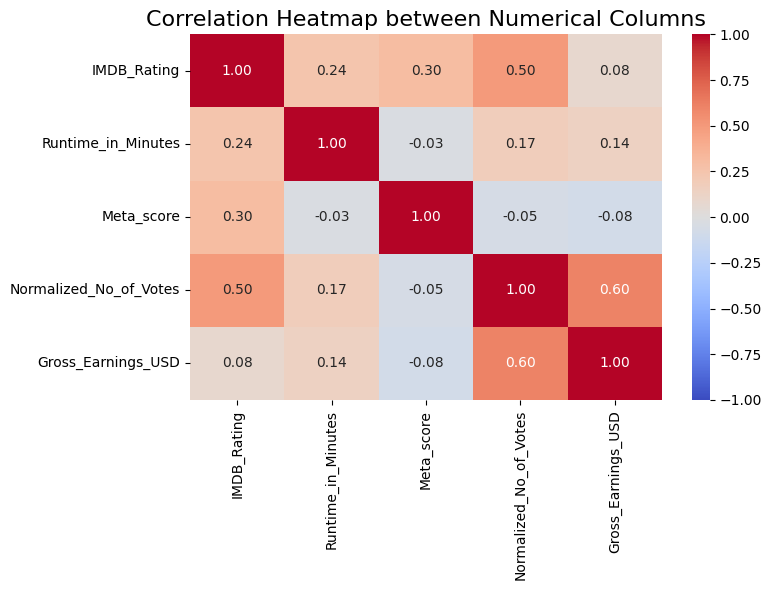

In [312]:
# Create a heatmap using Seaborn to identify correlations between numerical columns like IMDB_Rating, Meta_score, No_of_votes, and Gross.


numerical_cols = ['IMDB_Rating', 'Runtime_in_Minutes', 'Meta_score', 'Normalized_No_of_Votes', 'Gross_Earnings_USD']

# Compute the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, vmin=-1, vmax=1)

# Add title and labels
plt.title('Correlation Heatmap between Numerical Columns', fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()